In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Description
#### This dataset contains more than 1K playes b behaviors from Call of Duty: Modern Warfare multiplayer leader board

#### name: the name for each player
#### wins : number of times the player win a match
#### kills : number of kills the player made in all his matches
#### kdRatio : kill/deaths ratio that means, if a player has 10 kills and 5 deaths, his KD ratio is equal to 2. A KD ratio of 1 means that the player got killed exactly as many times as he successfully eliminated his opponents
####  killstreak : kill a number of enemy players without dying.
#### level : is the player grade
#### losses : total number of losing
#### prestige: it is an optional Mode that players can choose after they progress to Level 55 and max
#### hits : number of times the player damaged another player
#### timePlayed : the time spent by every player playing Call of Duty in hours
#### headshots : number of times the player hit the others with headshots
#### averageTime : avrage time
#### gamesPlayed : number of times the player play multiplyer match
#### assists : number of times player damaging an enemy but a teammate gets the kill.
#### misses : the number of times the player miss the hit
#### xp : Experience Points (XP) are a numerical quantity exclusive to multiplayer that dictates a player's level and progress in the game.
#### scorePerMinute :a measure of how many points players are gaining per unit time.
#### shots : number of shots the player did
#### deaths : number of time the player gots killed in the game.

In [2]:
cod = pd.read_csv('cod.csv') #Import the dataset
cod.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [3]:
cod.info() #Understand features and its data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [4]:
cod.isnull().sum() #Identify whether any features have missing values.

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [5]:
cod = cod.drop(['name'], axis = 1) # The feature 'name' is removed since is not relevant in the dataset.

## Data Exploration

#### Win Distribution of Players

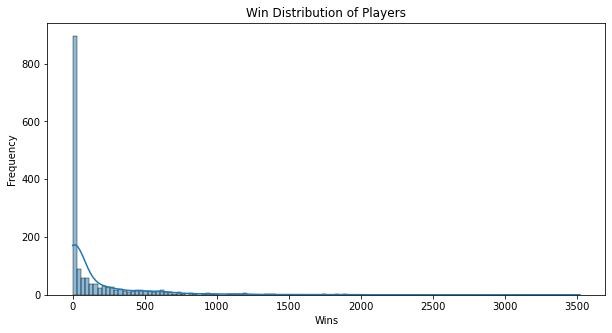

In [6]:
plt.figure(figsize=(10,5))
plt.title('Win Distribution of Players')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plot = sns.histplot(data= cod, x='wins', kde= True)

#### Distribution of Kill-Death Ratio of Players

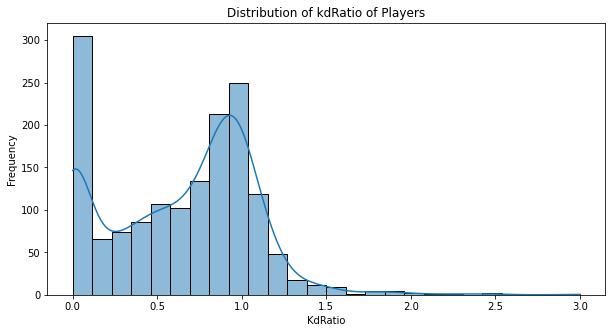

In [7]:
plt.figure(figsize=(10,5))
plt.title('Distribution of kdRatio of Players')
plt.xlabel('KdRatio')
plt.ylabel('Frequency')
plot = sns.histplot(data= cod, x='kdRatio', kde= True)

#### Kills vs Assists vs Deaths

<AxesSubplot:xlabel='level'>

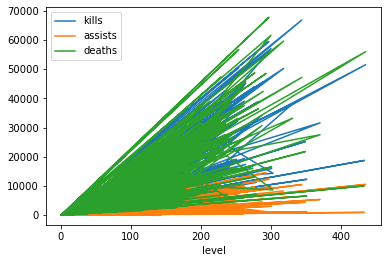

In [8]:
cod.plot(x='level',y=['kills','assists','deaths'])

#### Kill Streak vs Kill - Death Ratio

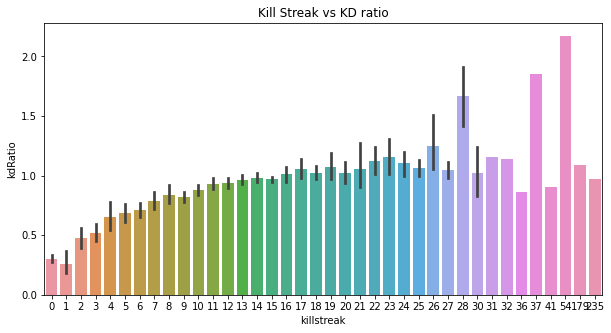

In [9]:
plt.figure(figsize=(10,5))
plt.title('Kill Streak vs KD ratio')
plt.xlabel('Kill Streak')
plt.ylabel('kd ratio')
plot = sns.barplot(data= cod, x='killstreak', y='kdRatio')

#### Kills vs Deaths

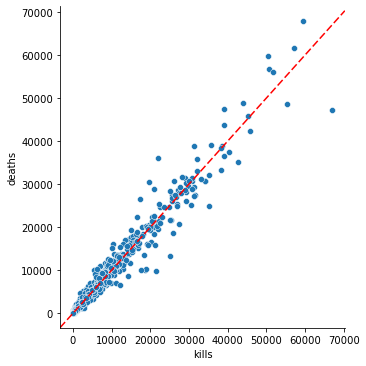

In [10]:
scat = sns.relplot(data=cod, x='kills', y = 'deaths')
scat.ax.axline(xy1 = (10,5), slope = 1, color ='r',dashes =(5,2))

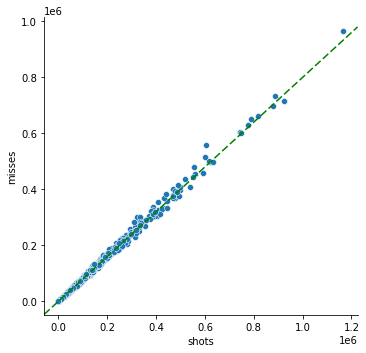

In [11]:
scat1 = sns.relplot(data =cod, x='shots', y='misses')
scat1.ax.axline(xy1 =(10,5), slope= 0.8, color= 'g', dashes=(5,2))

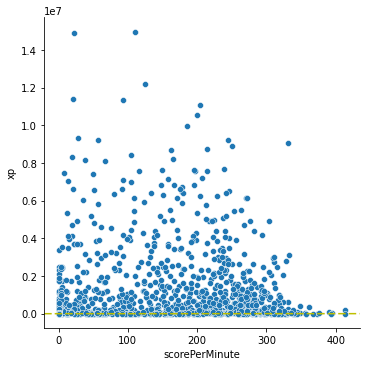

In [12]:
scat2 = sns.relplot(data = cod, x ='scorePerMinute', y='xp')
scat2.ax.axline(xy1=(10,5), slope = 5, color ='y', dashes = (5,2))

#### Correlation between Kill - Death ratio and other features

[Text(0.5, 1.0, 'Correlation between Kill Death ratio and other features')]

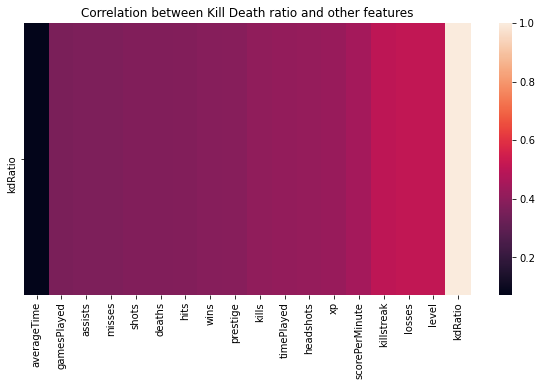

In [13]:
from dython.nominal import compute_associations
corr = compute_associations(cod)
plt.subplots(figsize=(10,5))
fig = sns.heatmap(corr[['kdRatio']].sort_values(by=['kdRatio']).T)
fig.set(title = 'Correlation between Kill Death ratio and other features')

# Data Preperation

In [14]:
#Selecting the features Kill- Death and Losses for Kmeans Clustering. 
x = cod.iloc[:,[3,2]].values
x

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.03125   ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [3.        , 0.68627451]])

In [15]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [16]:
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.558000e+03,1.558000e+03
mean,3.555849e-17,-9.965641e-17
std,1.000321e+00,1.000321e+00
min,-6.772520e-01,-1.480518e+00
25%,-6.772520e-01,-8.729679e-01
50%,-1.861608e-01,2.224812e-01
75%,5.013669e-01,7.394355e-01
max,2.240403e+01,5.491019e+00


# Modelling

##### In this phase we will be performing a K-Means Clustering since we need to classify the gamers level of  expertise in Call of Duty. Here the feature 'Kill-Death Ratio is most import aspect of understanding a players expertise in the game. The higher the ratio the higher the expertise of the player. Along with that one more feature will be included based on the highly correlated feature  for Kill - Death Ratio is 'Kill-Streak' which would also impacts the  expertise of the player. 

In [18]:
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as k-means+
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [19]:
# inertia on the fitted data
kmeans.inertia_

1581.3772806414393

In [21]:
# fitting multiple k-means algorithms and storing the values in an empty list
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++')
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)

C:\Users\Alan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  f"KMeans is known to have a memory leak on Windows "


In [22]:
wss

[3116.000000000002,
 1581.3772806414393,
 843.3144094508186,
 562.779063779629,
 451.0331824982279,
 364.0131443306828,
 295.84569229695256,
 248.2920155001891,
 220.11434711599068,
 200.6784759694917]

Text(0, 0.5, 'Inertia')

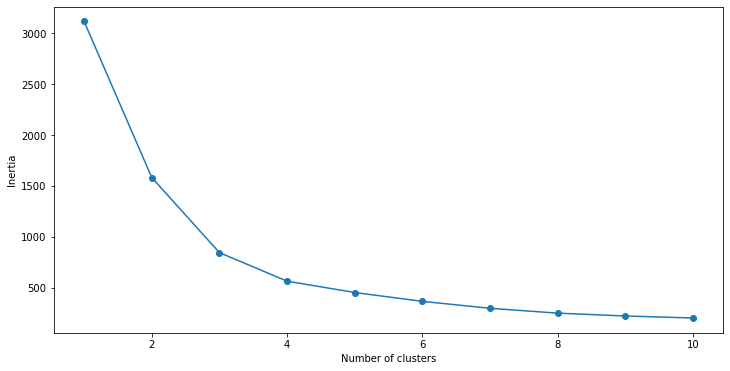

In [23]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'WSS':wss})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [31]:
#The elbow point is calculated simply by instantiating the KneeLocator
from kneed import KneeLocator
K_value = KneeLocator(range(1,11), wss, curve='convex', direction ='decreasing')
K_value.elbow

3

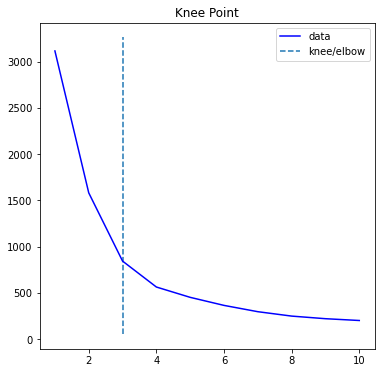

In [54]:
#Plotting the value of k(Number of Clusters)
K_value.plot_knee()

##### We select the value of K =3 since from the above graph we can observe that line is being constant after the K_value = 3.

In [55]:
kmeans = KMeans(n_clusters = 3 ,init = 'k-means++')
y_pred = kmeans.fit_predict(data_scaled)

Text(0, 0.5, 'Kill-Death ratio')

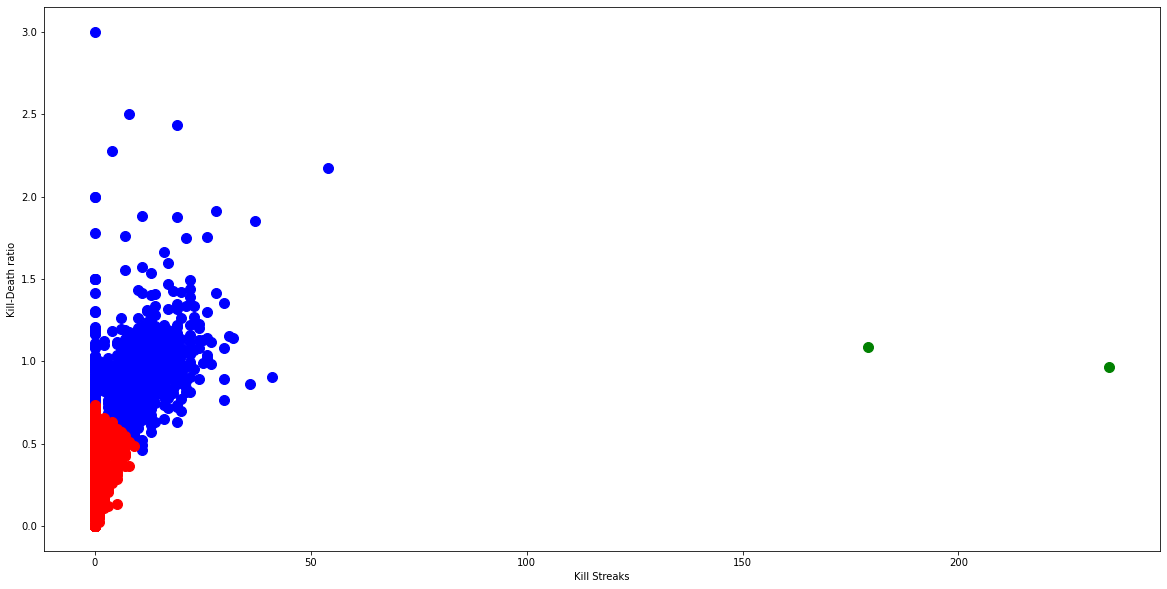

In [56]:
# Plotting the Kmeans Clustered data
plt.figure(figsize=(20,10))
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=100, c='blue', label = 'Cluster1')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=100, c='red', label = 'Cluster2')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=100, c='green', label = 'Cluster3')

plt.xlabel('Kill Streaks')
plt.ylabel('Kill-Death ratio')

#### Here cluster - 3 (Green) is ignored since players with higher kill streaks must have higher Kill-Death Ratio when comparing with other clusters. Since cluster 1 (Blue) is having players with higher Kill-Death ratio and Kill Streaks, the players in this cluster is said to be Pro- Players, cluster 2 (Red)  which is having a lower kill- streaks and kill death ratio the players in this cluster comes under the Elite level.

# Model Evaluation 

#### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

In [57]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y_pred)

0.49764496161335153

#### The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. So the accuracy of the model is approximately 75%.  